<a href="https://colab.research.google.com/github/Novadotgg/AQI/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/merged ddup.csv')
df.head()

<ipython-input-1-a41f1e4c1cc5>:11: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/merged ddup.csv')


,State,City,Station,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI,AQI Bucket
0,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",01-08-2021 00:00,02-08-2021 00:00,21.85,0.35,10.97,6.65,20.35,5.46,NaN,NaN
1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",02-08-2021 00:00,03-08-2021 00:00,23.57,0.39,11.88,7.20,24.83,7.07,NaN,NaN
2,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-08-2021 00:00,04-08-2021 00:00,22.4,0.35,11.86,8.41,28.16,6.96,NaN,NaN
3,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",04-08-2021 00:00,05-08-2021 00:00,20.71,0.41,11.49,7.60,20.86,5.09,NaN,NaN
4,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-08-2021 00:00,06-08-2021 00:00,20.84,0.31,15.08,7.09,26.44,5.91,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *

State              0
City               0
Station          505
From Date          0
To Date            0
Ozone          11774
CO             12559
SO2             9469
NO2            10986
PM10           11648
PM2.5          10023
AQI           207196
AQI Bucket    207196
dtype: int64

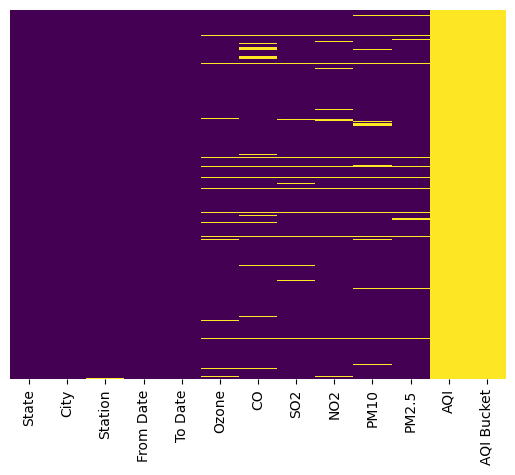

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [ ]:
df

,State,City,Station,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI,AQI Bucket
0,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",01-08-2021 00:00,02-08-2021 00:00,21.85,0.35,10.97,6.65,20.35,5.46,NaN,NaN
1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",02-08-2021 00:00,03-08-2021 00:00,23.57,0.39,11.88,7.20,24.83,7.07,NaN,NaN
2,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-08-2021 00:00,04-08-2021 00:00,22.4,0.35,11.86,8.41,28.16,6.96,NaN,NaN
3,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",04-08-2021 00:00,05-08-2021 00:00,20.71,0.41,11.49,7.60,20.86,5.09,NaN,NaN
4,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-08-2021 00:00,06-08-2021 00:00,20.84,0.31,15.08,7.09,26.44,5.91,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207191,Tripura,Agartala,NaN,27-07-2023 00:00,28-07-2023 00:00,2.17,0.23,21.43,5.11,49.07,34.23,NaN,NaN
207192,Tripura,Agartala,NaN,28-07-2023 00:00,29-07-2023 00:00,4.39,0.28,21.5,5.72,50.49,38.59,NaN,NaN
207193,Tripura,Agartala,NaN,29-07-2023 00:00,30-07-2023 00:00,2.15,0.40,21.53,5.30,63.45,42.77,NaN,NaN
207194,Tripura,Agartala,NaN,30-07-2023 00:00,31-07-2023 00:00,6.72,0.32,21.71,6.05,58.05,45.08,NaN,NaN


In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
df.describe()

,CO,NO2,PM10,PM2.5,AQI,AQI Bucket
count,194637.000000,196210.000000,195548.000000,197173.000000,0.0,0.0
mean,0.889014,26.163870,126.096532,58.302650,NaN,NaN
std,0.655517,25.376283,96.486306,54.067406,NaN,NaN
min,0.000000,0.010000,0.170000,0.050000,NaN,NaN
25%,0.470000,10.520000,56.380000,23.630000,NaN,NaN
50%,0.740000,19.420000,98.080000,41.680000,NaN,NaN
75%,1.120000,33.880000,167.240000,73.710000,NaN,NaN
max,11.400000,500.000000,1000.000000,985.000000,NaN,NaN


In [ ]:
df.columns

Index(['State', 'City', 'Station', 'From Date', 'To Date', 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI', 'AQI Bucket'],
      dtype='object')

In [ ]:
print(df['PM10'].head())  # Print the first few rows of the PM10 column


0    20.35
1    24.83
2    28.16
3    20.86
4    26.44
Name: PM10, dtype: float64


In [ ]:
x=(df['PM10'].mean())

In [ ]:
#Filling the null values
# df.iloc[:,5:10]=df.groupby("City").transform(lambda x:x.fillna(x.mean()))
# df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']] = df.groupby("City")[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].transform(lambda x: x.fillna(x.mean()))
# df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']] = df.groupby("State")[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].transform(lambda x: x.fillna(x.mean()))
columns_to_fill = ['Ozone', 'CO', 'SO2', 'NO2', 'PM2.5']
# Convert columns to numeric types
df[columns_to_fill] = df[columns_to_fill].apply(pd.to_numeric, errors='coerce')

# # Filling null values with mean of respective columns
for column in columns_to_fill:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

df['PM10'].fillna(x,inplace=True)



In [ ]:
df

,State,City,Station,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI,AQI Bucket
0,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",01-08-2021 00:00,02-08-2021 00:00,21.85,0.35,10.97,6.65,20.35,5.46,NaN,NaN
1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",02-08-2021 00:00,03-08-2021 00:00,23.57,0.39,11.88,7.20,24.83,7.07,NaN,NaN
2,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-08-2021 00:00,04-08-2021 00:00,22.40,0.35,11.86,8.41,28.16,6.96,NaN,NaN
3,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",04-08-2021 00:00,05-08-2021 00:00,20.71,0.41,11.49,7.60,20.86,5.09,NaN,NaN
4,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-08-2021 00:00,06-08-2021 00:00,20.84,0.31,15.08,7.09,26.44,5.91,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207191,Tripura,Agartala,NaN,27-07-2023 00:00,28-07-2023 00:00,2.17,0.23,21.43,5.11,49.07,34.23,NaN,NaN
207192,Tripura,Agartala,NaN,28-07-2023 00:00,29-07-2023 00:00,4.39,0.28,21.50,5.72,50.49,38.59,NaN,NaN
207193,Tripura,Agartala,NaN,29-07-2023 00:00,30-07-2023 00:00,2.15,0.40,21.53,5.30,63.45,42.77,NaN,NaN
207194,Tripura,Agartala,NaN,30-07-2023 00:00,31-07-2023 00:00,6.72,0.32,21.71,6.05,58.05,45.08,NaN,NaN


In [ ]:
df.isnull().sum()

State              0
City               0
Station          505
From Date          0
To Date            0
Ozone              0
CO                 0
SO2                0
NO2                0
PM10               0
PM2.5              0
AQI           207196
AQI Bucket    207196
dtype: int64

<Axes: >

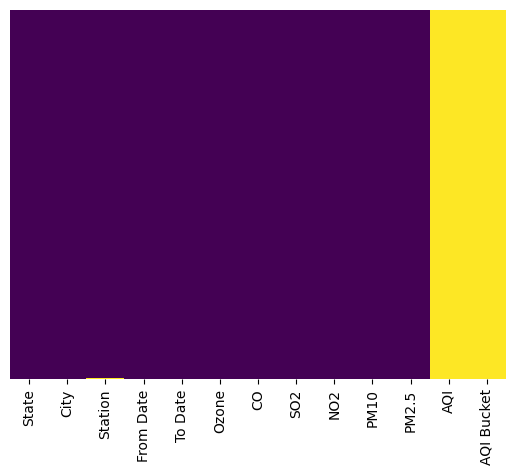

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# AQI Calculation

In [ ]:
def PM10_subindex(x):
  if x<=50:
    return x
  elif x>50 and x<=100:
    return x
  elif x>100 and x<=250:
    return 100+(x-100)*100/150
  elif x>250 and x<=350:
    return 200+(x-250)
  elif x>350 and x<=430:
    return 300+(x-350)*100/80
  elif x>430:
    return 400+(x-430)*100/80
  else:
    return 0
df["PM10_Sub"]=df["PM10"].astype(int).apply(lambda x: PM10_subindex(x))

def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_Sub"] = df["PM2.5"].astype(int).apply(lambda x: PM25_subindex(x))


# SO2 Sub-Index calculation
def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_Sub"] = df["SO2"].astype(int).apply(lambda x: SO2_subindex(x))

# NOx Sub-Index calculation
def NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_Sub"] = df["NO2"].astype(int).apply(lambda x: NO2_subindex(x))


# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_Sub"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_Sub"] = df["Ozone"].astype(int).apply(lambda x: O3_subindex(x))


In [ ]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_Sub", "PM10_Sub", "SO2_Sub", "NO2_Sub", "CO_Sub", "O3_Sub"]].max(axis = 1)))

<Axes: >

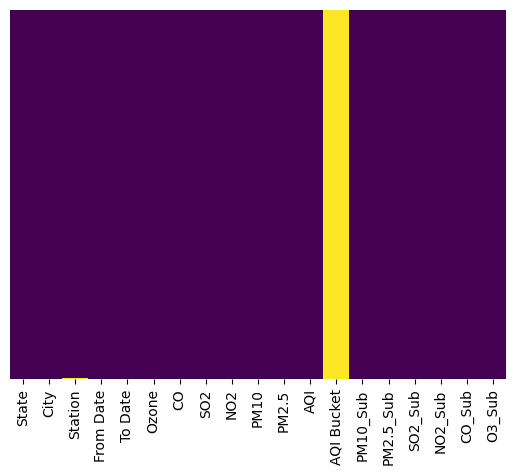

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

df["AQI Bucket"] = df["AQI Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

<Axes: >

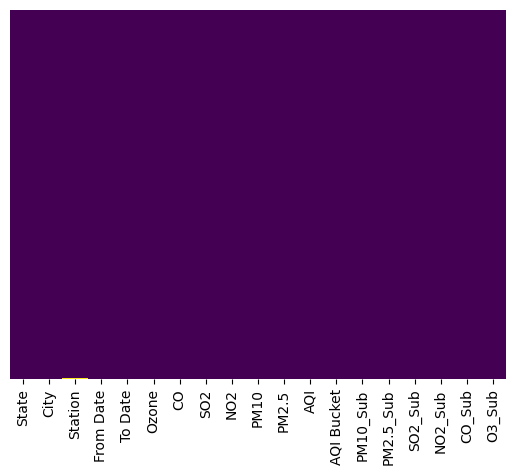

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.tail()

,State,City,Station,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI,AQI Bucket,PM10_Sub,PM2.5_Sub,SO2_Sub,NO2_Sub,CO_Sub,O3_Sub
207191,Tripura,Agartala,NaN,27-07-2023 00:00,28-07-2023 00:00,2.17,0.23,21.43,5.11,49.07,34.23,57.0,Satisfactory,49.0,56.666667,26.25,6.25,0.0,2.0
207192,Tripura,Agartala,NaN,28-07-2023 00:00,29-07-2023 00:00,4.39,0.28,21.50,5.72,50.49,38.59,63.0,Satisfactory,50.0,63.333333,26.25,6.25,0.0,4.0
207193,Tripura,Agartala,NaN,29-07-2023 00:00,30-07-2023 00:00,2.15,0.40,21.53,5.30,63.45,42.77,70.0,Satisfactory,63.0,70.000000,26.25,6.25,0.0,2.0
207194,Tripura,Agartala,NaN,30-07-2023 00:00,31-07-2023 00:00,6.72,0.32,21.71,6.05,58.05,45.08,75.0,Satisfactory,58.0,75.000000,26.25,7.50,0.0,6.0
207195,Tripura,Agartala,NaN,31-07-2023 00:00,31-07-2023 00:00,10.56,0.26,21.27,5.94,42.51,28.49,47.0,Good,42.0,46.666667,26.25,6.25,0.0,10.0


In [ ]:
#correlation heatmap
# numeric_df = df.select_dtypes(include=['float64', 'int64'])
# plt.figure(figsize=(12,10))
# sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

In [ ]:
# df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(50,50))
# plt.title('Average AQI in last 5 years');
# df[['State', 'AQI']].groupby('State').mean().sort_values('AQI').plot(kind='bar', cmap='Blues_r', figsize=(15, 10))
# plt.title('Average AQI by State in Last 5 Years')
# plt.xlabel('State')
# plt.ylabel('Average AQI')
# plt.show()


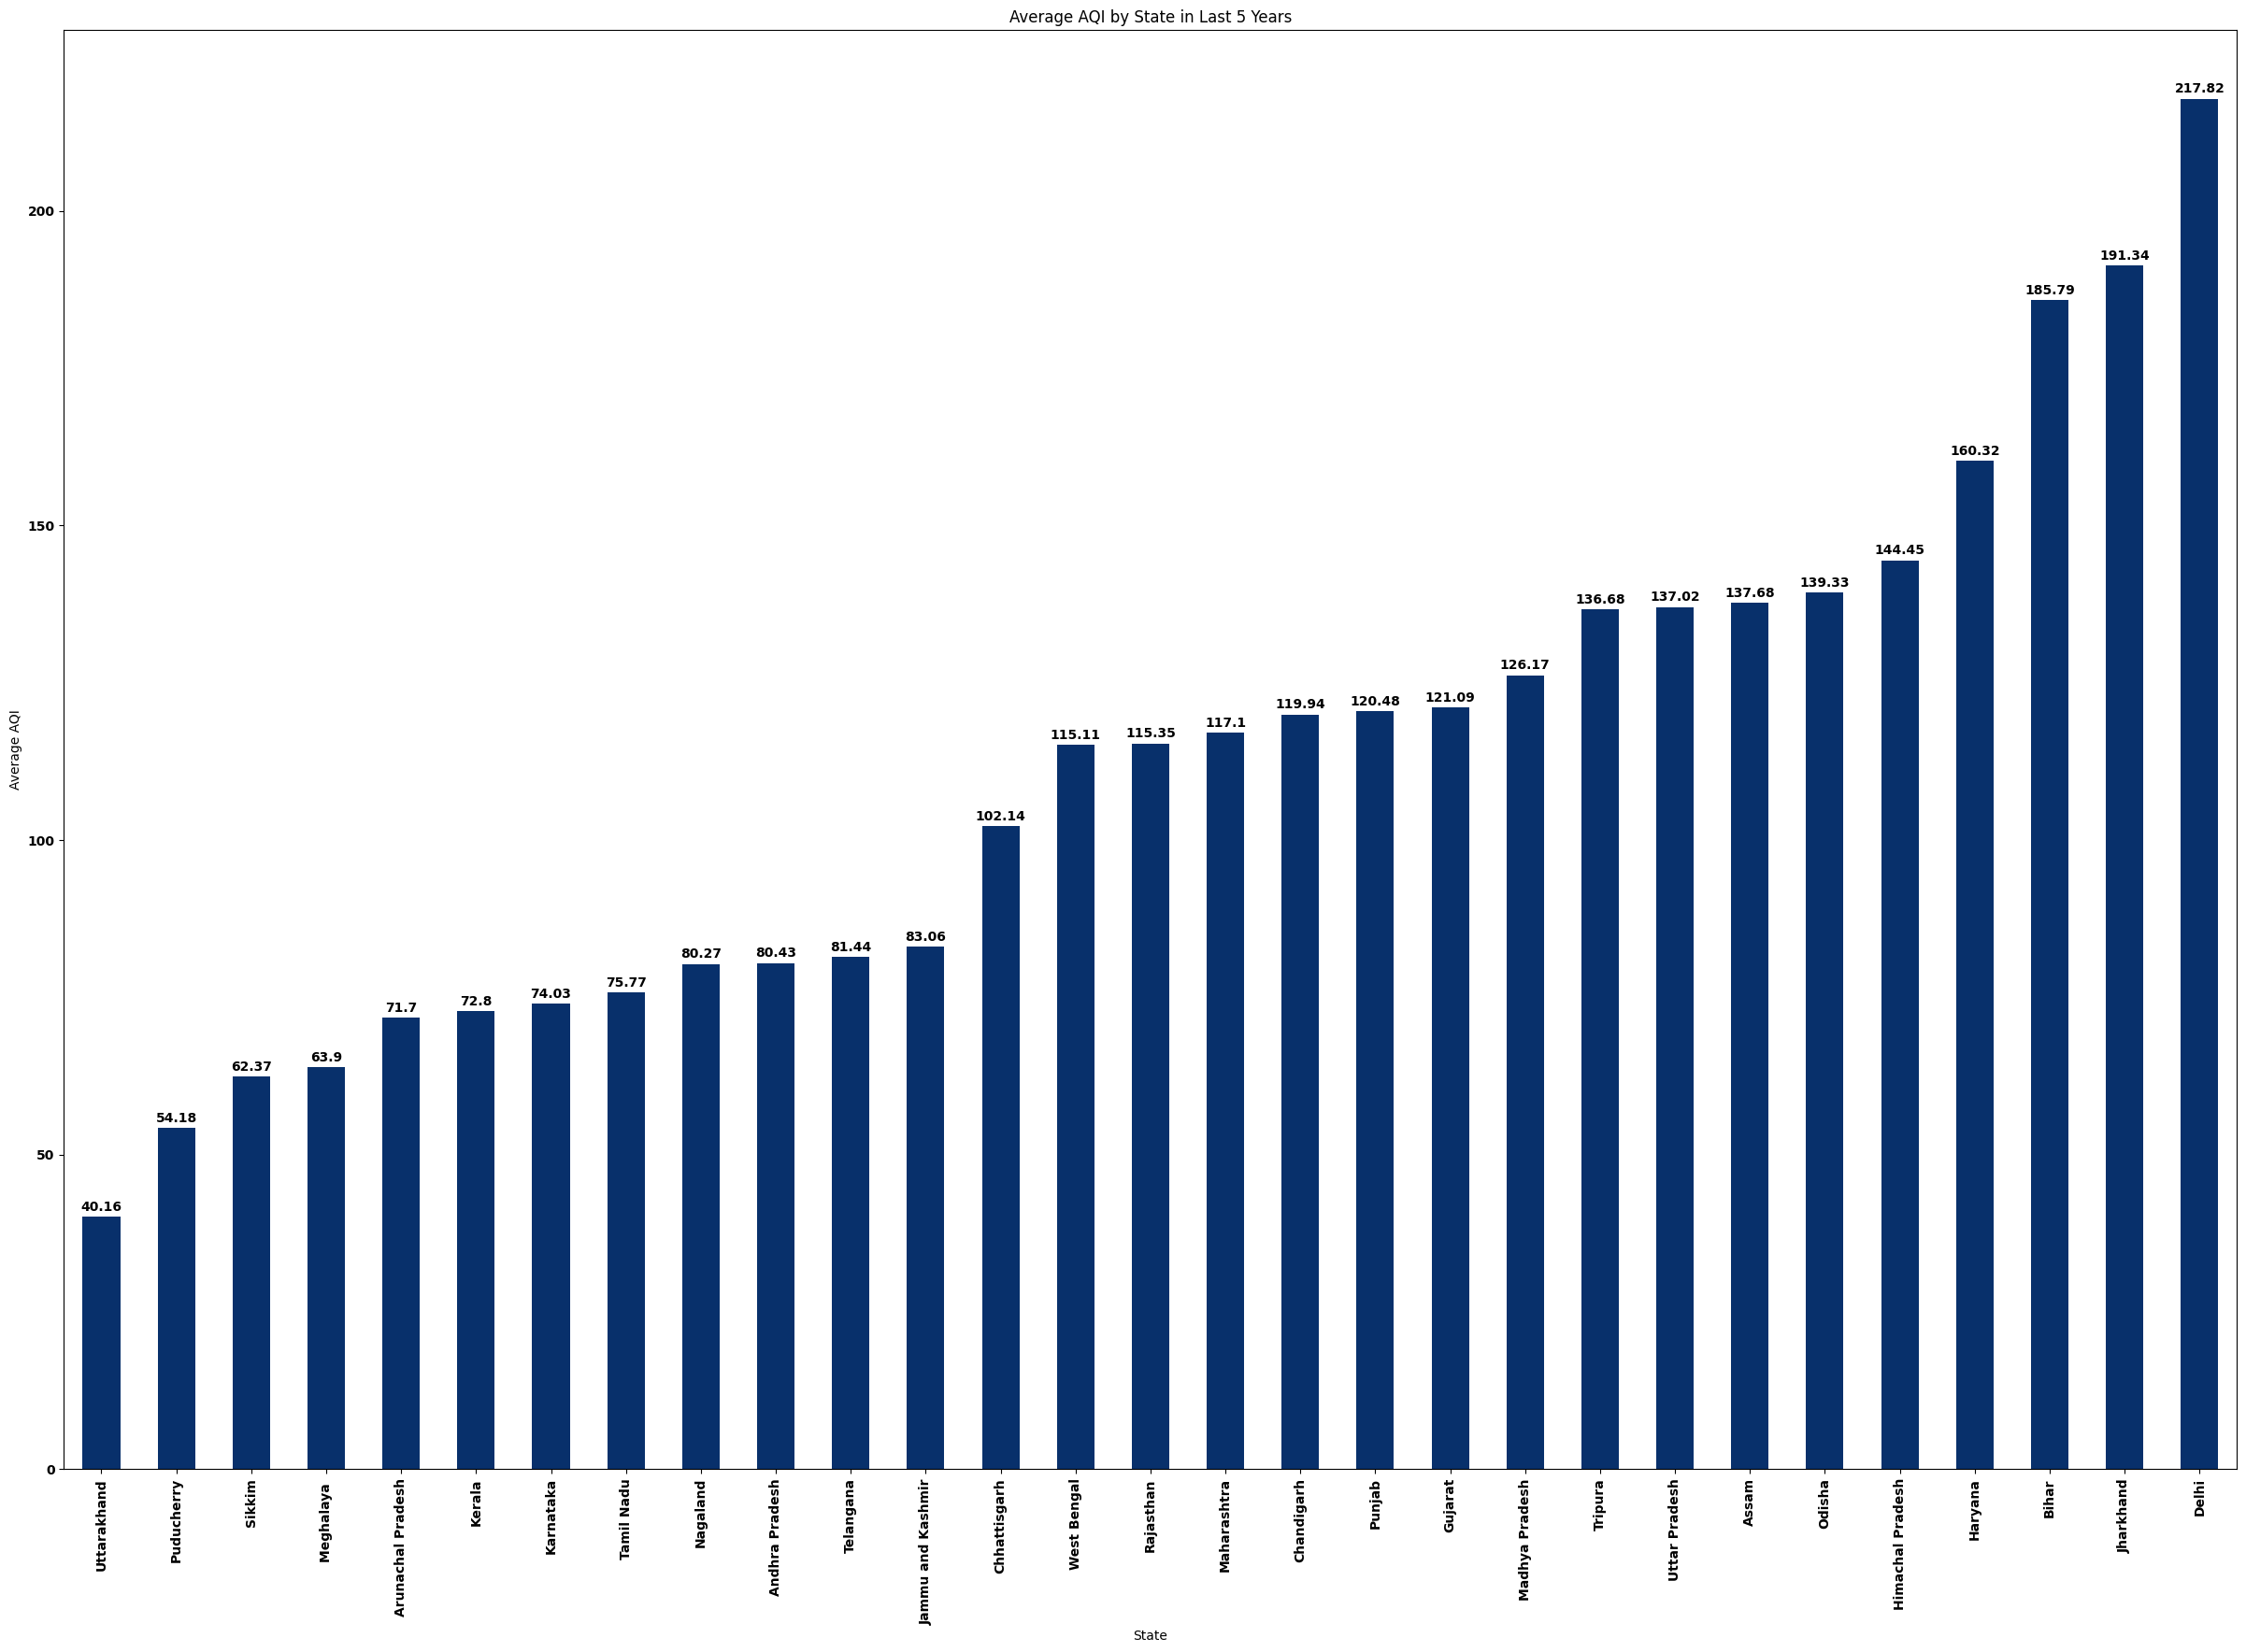

In [ ]:
mean_aqi_by_state = df.groupby('State')['AQI'].mean().sort_values()
ax = mean_aqi_by_state.plot(kind='bar', cmap='Blues_r', figsize=(30, 20))
for i, v in enumerate(mean_aqi_by_state):
    ax.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Average AQI by State in Last 5 Years')
plt.xlabel('State')
plt.ylabel('Average AQI')

plt.show()


In [ ]:
#Model
new_df= df[['AQI', 'AQI Bucket']].copy()
new_df

,AQI,AQI Bucket
0,21.0,Good
1,24.0,Good
2,28.0,Good
3,20.0,Good
4,26.0,Good
...,...,...
207191,57.0,Satisfactory
207192,63.0,Satisfactory
207193,70.0,Satisfactory
207194,75.0,Satisfactory


In [ ]:
new_df['AQI Bucket'].unique()

array(['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [ ]:
new_df['AQI Bucket'] = new_df['AQI Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
new_df.head()

,AQI,AQI Bucket
0,21.0,0
1,24.0,0
2,28.0,0
3,20.0,0
4,26.0,0


In [ ]:
X = new_df[['AQI']]
y = new_df[['AQI Bucket']]

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

# Random Forest classification better hyperparameters


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0)

# clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
# clf = RandomForestClassifier(random_state = 0,n_estimators=500,max_depth=10,min_samples_split=2,min_samples_leaf=1,bootstrap=True,criterion: 'gini').fit(X_train, y_train)
clf = RandomForestClassifier(random_state=0,
                             n_estimators=500,
                             max_depth=10,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             bootstrap=True,
                             criterion='gini').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6973686750709474


In [ ]:
# print("Enter the value of AQI:")
# AQI = float(input("AQI : "))
# output = clf.predict([[AQI]])
# output
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

Enter the value of AQI:
AQI : 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8454
           1       1.00      1.00      1.00     15506
           2       1.00      1.00      1.00     18036
           3       1.00      1.00      1.00      4515
           4       1.00      1.00      1.00      4309
           5       1.00      1.00      1.00       979

    accuracy                           1.00     51799
   macro avg       1.00      1.00      1.00     51799
weighted avg       1.00      1.00      1.00     51799

[[ 8454     0     0     0     0     0]
 [    0 15506     0     0     0     0]
 [    0     0 18036     0     0     0]
 [    0     0     0  4515     0     0]
 [    0     0     0     0  4309     0]
 [    0     0     0     0     0   979]]


# Random forest classification

In [ ]:
#Random forest train test split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
# clf = RandomForestClassifier().fit(X_train, y_train)
# y_pred = clf.predict(X_test)

<ipython-input-233-592c43ea96a6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier().fit(X_train, y_train)


In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

In [ ]:
features.shape


(207196, 6)

In [ ]:
labels.shape

(207196,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 2)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
clf = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=5)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
clf.feature_importances_

array([0.02883503, 0.11968291, 0.02544465, 0.06459988, 0.49644171,
       0.26499582])

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([117., 130., 140., ...,  69.,  57.,  29.])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.5518098455598456

In [ ]:
# print(classification_report(y_pred,y_test))

# Random Forest Regression

In [ ]:
#Regression

In [ ]:
df.columns

Index(['State', 'City', 'Station', 'From Date', 'To Date', 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI', 'AQI Bucket', 'PM10_Sub',
       'PM2.5_Sub', 'SO2_Sub', 'NO2_Sub', 'CO_Sub', 'O3_Sub'],
      dtype='object')

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 2)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# regr=RandomForestRegressor(max_depth=2,random_state=0)
regr = RandomForestRegressor(n_estimators=500,
                              max_depth=20,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='auto',
                              bootstrap=True,
                              random_state=0)
regr.fit(X_train,y_train)
print(regr.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[158.006      130.         140.132      ...  69.02092313  57.01840579
  21.27881729]


In [ ]:
y_pred=regr.predict(X_test)
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9996964256141037

# SVM classification


In [ ]:
# features=df[[ 'Ozone', 'CO',
#        'SO2', 'NO2', 'PM10', 'PM2.5']]
# labels=df['AQI']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
# from sklearn import svm

In [ ]:
# classifier=svm.SVC(kernel="linear",gamma=0.5,C=2)
# classifier = svm.SVC(C=1.0,
#                      kernel='rbf',
#                      gamma='scale',
#                      class_weight=None,
#                      tol=0.001)

In [ ]:
# classifier.fit(X_train,y_train)
# y_pred=classifier.predict(X_test)

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# accuracy

0.16235521235521236

# K-nearest neighbour

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# param_grid = {
#     'n_neighbors': [7],
#     'weights': ['uniform'],
#     'algorithm': ['auto'],
#     'metric': ['euclidean']
# }


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto', metric='euclidean')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.23988899613899614

In [ ]:
# knn=KNeighborsClassifier(n_neighbors=100)
# knn.fit(X_train,y_train)
# knn.score(X_test,y_test)
# y_pred=knn.predict(X_test)
# # knn.score(X_test,y_test)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline

# # Define the k-NN classifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # Create a pipeline with feature scaling and k-NN classifier
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Feature scaling
#     ('knn', knn)  # k-NN classifier
# ])

# # Train the pipeline
# pipeline.fit(X_train, y_train)

# # Evaluate accuracy
# accuracy = pipeline.score(X_test, y_test)
# print("Accuracy with feature scaling:", accuracy)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for grid search
# param_grid = {
#     'knn__n_neighbors': [3, 5, 7],
#     'knn__weights': ['uniform', 'distance'],
#     'knn__p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Evaluate accuracy with the best model
# accuracy = grid_search.best_estimator_.score(X_test, y_test)
# print("Accuracy after hyperparameter tuning:", accuracy)


In [ ]:
# from sklearn.metrics import *
# print(confusion_matrix(y_pred,y_test))

In [ ]:
# print(classification_report(y_pred,y_test))

In [ ]:
# accuracy=accuracy_score(y_pred,y_test)
# print(accuracy)

# Decision Tree

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.905019305019305


# Multilayer perceptron

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


In [ ]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [ ]:
y_pred=mlp.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.3866312741312741


Logistic Regression


In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# logistic_regression = LogisticRegression(max_iter=1000)
# m=LogisticRegression(max_iter=500)
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

In [ ]:
# m.fit(X_train,y_train)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred=m.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.06976351351351351


# Naive Bayes

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
mo=GaussianNB()

In [ ]:
mo.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=mo.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.18260135135135136


CNN


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

**Boosting**

Gradient Boosting

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 99)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=3,
                                     random_state=42)

In [ ]:
gb_model.fit(X_train, y_train)